In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine

In [2]:
load_dotenv(dotenv_path=".env")
db = os.getenv("db_url")
engine = create_engine(db)

In [3]:
nyc = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.nyc", con=engine)
la = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.la", con=engine)
chicago = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.chicago", con=engine)
bay = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.bay", con=engine)
dallas = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.dallas", con=engine)
dc = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.dc", con=engine)
houston = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.houston", con=engine)
boston = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.boston", con=engine)
atlanta = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.atlanta", con=engine)
seattle = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan, pop_den FROM public.seattle", con=engine)

In [4]:
import matplotlib.pyplot as plt

In [5]:
cities = [nyc, la, chicago, bay, dallas, dc, houston, boston, atlanta, seattle]
for c in cities:
  c.pop_inverse = 1/(c.pop_den)

C:\Users\kdgki\AppData\Local\Temp\ipykernel_8520\949482375.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  c.pop_inverse = 1/(c.pop_den)


In [6]:
for city in cities:
  print(city.shape[0])

122515
97167
118117
54669
93977
49962
65666
54651
45276
44049


In [7]:
city = {
    "nyc": nyc,
    "la": la,
    "chicago": chicago,
    "bay": bay,
    "dallas": dallas,
    "dc": dc,
    "houston": houston,
    "boston": boston,
    "atlanta": atlanta,
    "seattle": seattle
}

In [8]:
combined = pd.concat([c for c in cities], axis=0)

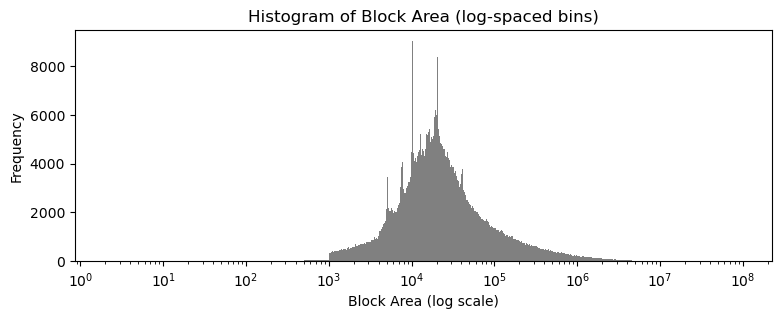

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = combined.area
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 1000)

plt.figure(figsize=(9,3))
plt.hist(x, bins=bins, edgecolor=None, color='grey')
plt.xscale("log")
plt.xlabel("Block Area (log scale)")
plt.ylabel("Frequency")
plt.title("Histogram of Block Area (log-spaced bins)")
plt.show()

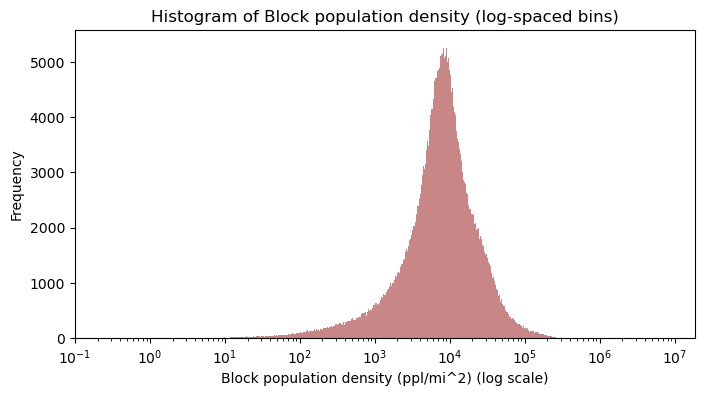

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = combined.pop_den[combined.pop_den>0]
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 1000)

plt.figure(figsize=(8,4))
plt.hist(x, bins=bins, edgecolor=None, color="#c98686")
plt.xscale("log")
plt.xlabel("Block population density (ppl/mi^2) (log scale)")
plt.ylabel("Frequency")
plt.title("Histogram of Block population density (log-spaced bins)")
plt.show()

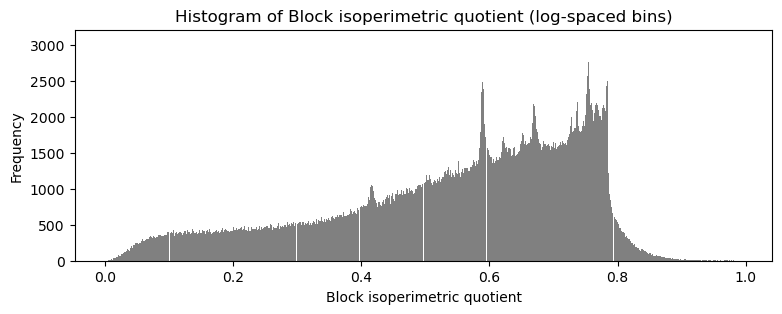

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = combined.isoperi
bins=1000

plt.figure(figsize=(9,3))
plt.hist(x, bins=bins, edgecolor=None, color='grey')
plt.xlabel("Block isoperimetric quotient")
plt.ylabel("Frequency")
plt.title("Histogram of Block isoperimetric quotient (log-spaced bins)")
plt.show()

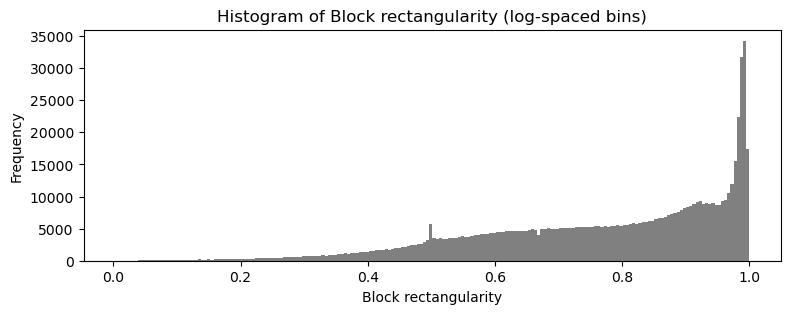

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = combined.rectan
bins=200

plt.figure(figsize=(9,3))
plt.hist(x, bins=bins, edgecolor=None, color='grey')
plt.xlabel("Block rectangularity")
plt.ylabel("Frequency")
plt.title("Histogram of Block rectangularity (log-spaced bins)")
plt.show()

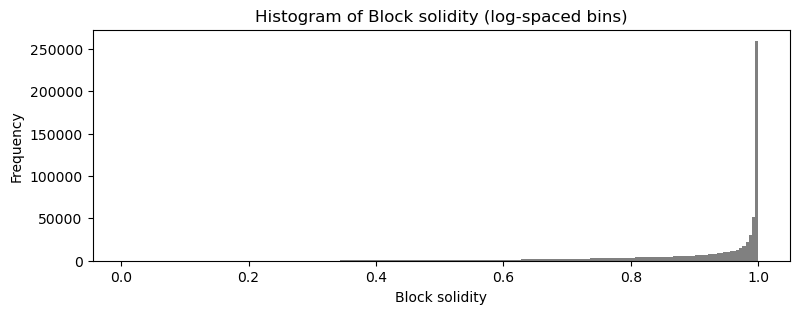

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = combined.solidity
bins=200

plt.figure(figsize=(9,3))
plt.hist(x, bins=bins, edgecolor=None, color='grey')
plt.xlabel("Block solidity")
plt.ylabel("Frequency")
plt.title("Histogram of Block solidity (log-spaced bins)")
plt.show()

# Linear Model for predicting population

Models were fit individually in order to value each variable's performance instead of overall

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize

x = np.array(np.log(combined.area[combined.pop_den > 0])).reshape(-1, 1)
y = np.log(combined.pop_den[combined.pop_den > 0])

ols_area = LinearRegression().fit(x, y)
print(ols_area.intercept_)   # intercept B0
print(ols_area.coef_)        # beta values Bj

y_pred_log = ols_area.predict(x)

# Evaluate model performance in log-space
mse = mean_squared_error(y, y_pred_log)
r2 = r2_score(y, y_pred_log)

print(mse)
print(r2)

15.751576799133755
[-0.67884314]
0.8887124348595947
0.4355235561298374


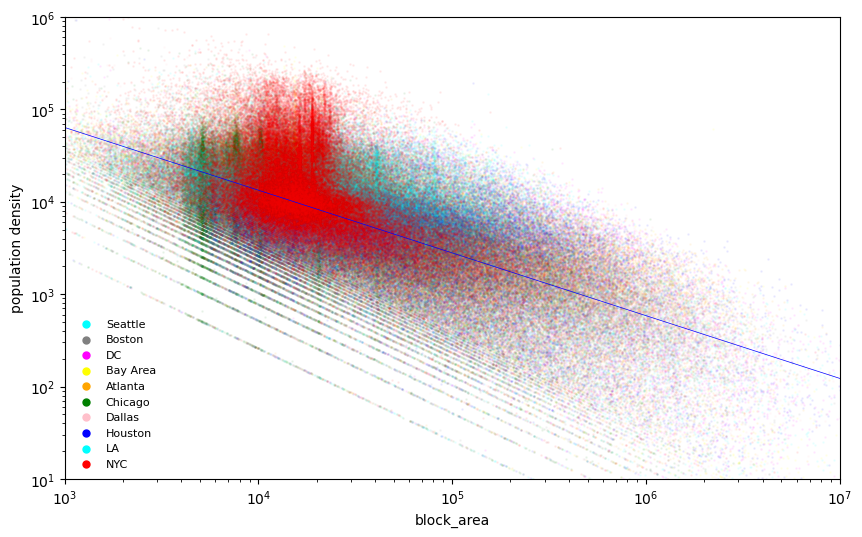

In [63]:
trans=0.05
size=1

plt.figure(figsize=(10,6))
plt.scatter(seattle.area, seattle.pop_den, alpha=trans, s=size, c='aqua', label='Seattle')
plt.scatter(boston.area, boston.pop_den, alpha=trans, s=size, c='grey', label='Boston')
plt.scatter(dc.area, dc.pop_den, alpha=trans, s=size, c='magenta', label='DC')
plt.scatter(bay.area, bay.pop_den, alpha=trans, s=size, c='yellow', label='Bay Area')
plt.scatter(atlanta.area, atlanta.pop_den, alpha=trans, s=size, c='orange', label='Atlanta')
plt.scatter(chicago.area, chicago.pop_den, alpha=trans, s=size, c='green', label='Chicago')
plt.scatter(dallas.area, dallas.pop_den, alpha=trans, s=size, c='pink', label='Dallas')
plt.scatter(houston.area, houston.pop_den, alpha=trans, s=size, c='blue', label='Houston')
plt.scatter(la.area, la.pop_den, alpha=trans, s=size, c='cyan', label='LA')
plt.scatter(nyc.area, nyc.pop_den, alpha=trans, s=size, c='red', label='NYC')

gx = np.logspace(np.log10(combined.area.min()), np.log10(combined.area.max()), 100)
# line_area = np.exp(ols_area.intercept_) * (gx ** ols_area.coef_[0])
line_area = np.exp(ols_area.intercept_) * gx ** ols_area.coef_[0]
plt.plot(gx, line_area, color='blue', linewidth=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e3, 1e7)
plt.ylim(1e1, 1e6)

plt.xlabel('block_area')
plt.ylabel('population density')
leg = plt.legend(loc='lower left', fontsize=8, frameon=False, markerscale=5)
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

In [64]:
x = np.array(combined.isoperi[combined.pop_den > 0]).reshape(-1, 1)
y = np.log(combined.pop_den[combined.pop_den > 0])

ols_iso = LinearRegression().fit(x, y)
print(ols_iso.intercept_)   # intercept B0
print(ols_iso.coef_)        # beta values Bj

y_pred_log = ols_iso.predict(x)

# Evaluate model performance in log-space
mse = mean_squared_error(y, y_pred_log)
r2 = r2_score(y, y_pred_log)

print(mse)
print(r2)

7.8536308322721045
[1.67547624]
1.499112342170093
0.04782067778343235


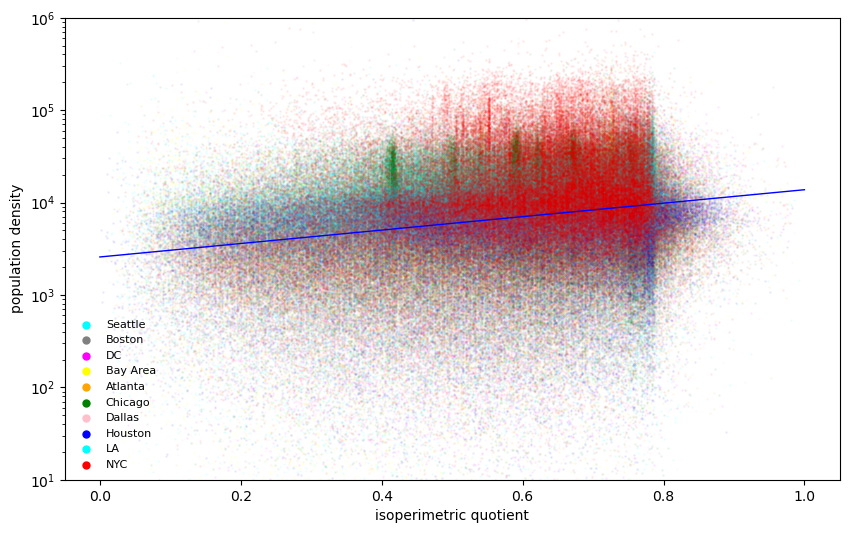

In [17]:
trans=0.05
size=1

plt.figure(figsize=(10,6))
plt.scatter(seattle.isoperi, seattle.pop_den, alpha=trans, s=size, c='aqua', label='Seattle')
plt.scatter(boston.isoperi, boston.pop_den, alpha=trans, s=size, c='grey', label='Boston')
plt.scatter(dc.isoperi, dc.pop_den, alpha=trans, s=size, c='magenta', label='DC')
plt.scatter(bay.isoperi, bay.pop_den, alpha=trans, s=size, c='yellow', label='Bay Area')
plt.scatter(atlanta.isoperi, atlanta.pop_den, alpha=trans, s=size, c='orange', label='Atlanta')
plt.scatter(chicago.isoperi, chicago.pop_den, alpha=trans, s=size, c='green', label='Chicago')
plt.scatter(dallas.isoperi, dallas.pop_den, alpha=trans, s=size, c='pink', label='Dallas')
plt.scatter(houston.isoperi, houston.pop_den, alpha=trans, s=size, c='blue', label='Houston')
plt.scatter(la.isoperi, la.pop_den, alpha=trans, s=size, c='cyan', label='LA')
plt.scatter(nyc.isoperi, nyc.pop_den, alpha=trans, s=size, c='red', label='NYC')

gx = np.linspace(0,1,100)
line_iso = np.exp(ols_iso.intercept_ + ols_iso.coef_[0] * gx)
plt.plot(gx, line_iso, color='blue', linewidth=1)

# plt.xscale("log")
plt.yscale("log")
plt.ylim(1e1,1e6)

plt.xlabel('isoperimetric quotient')
plt.ylabel('population density')
leg = plt.legend(loc='lower left', fontsize=8, frameon=False, markerscale=5)
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

In [18]:
x = np.array(combined.rectan[combined.pop_den > 0]).reshape(-1, 1)
y = np.log(combined.pop_den[combined.pop_den > 0])

ols_rec = LinearRegression().fit(x, y)
print(ols_rec.intercept_)   # intercept B0
print(ols_rec.coef_)        # beta values Bj

y_pred_log = ols_rec.predict(x)

# Evaluate model performance in log-space
mse = mean_squared_error(y, y_pred_log)
r2 = r2_score(y, y_pred_log)

print(mse)
print(r2)

6.926611285406124
[2.41350871]
1.3815152879406103
0.12251386804080988


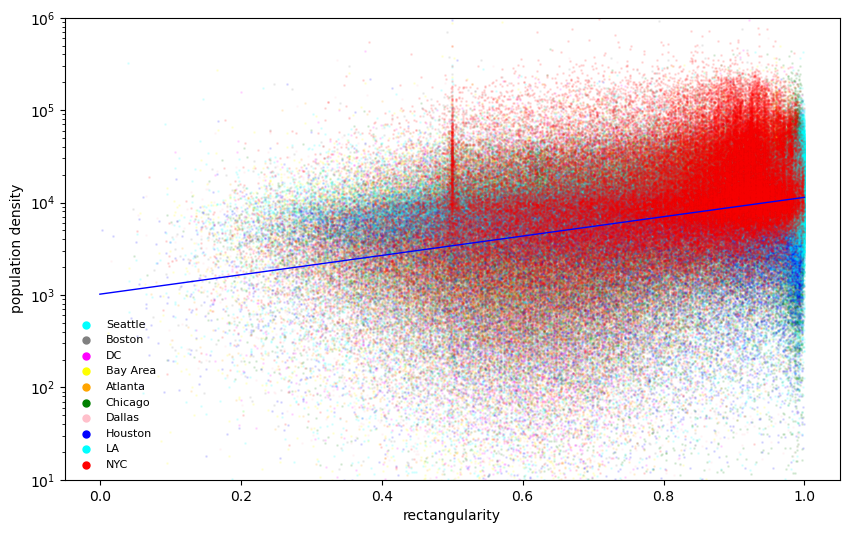

In [19]:
trans=0.1
size=1

plt.figure(figsize=(10,6))

plt.scatter(seattle.rectan, seattle.pop_den, alpha=trans, s=size, c='aqua', label='Seattle')
plt.scatter(boston.rectan, boston.pop_den, alpha=trans, s=size, c='grey', label='Boston')
plt.scatter(dc.rectan, dc.pop_den, alpha=trans, s=size, c='magenta', label='DC')
plt.scatter(bay.rectan, bay.pop_den, alpha=trans, s=size, c='yellow', label='Bay Area')
plt.scatter(atlanta.rectan, atlanta.pop_den, alpha=trans, s=size, c='orange', label='Atlanta')
plt.scatter(chicago.rectan, chicago.pop_den, alpha=trans, s=size, c='green', label='Chicago')
plt.scatter(dallas.rectan, dallas.pop_den, alpha=trans, s=size, c='pink', label='Dallas')
plt.scatter(houston.rectan, houston.pop_den, alpha=trans, s=size, c='blue', label='Houston')
plt.scatter(la.rectan, la.pop_den, alpha=trans, s=size, c='cyan', label='LA')
plt.scatter(nyc.rectan, nyc.pop_den, alpha=trans, s=size, c='red', label='NYC')

gx = np.linspace(0,1,100)
line_rec = np.exp(ols_rec.intercept_ + ols_rec.coef_[0] * gx)
plt.plot(gx, line_rec, color='blue', linewidth=1)

# plt.xscale("log")
plt.yscale("log")
# plt.ylim(0, 30000)
# plt.ylim(100,100000)

plt.xlabel('rectangularity')
plt.ylabel('population density')
plt.ylim(1e1,1e6)
leg = plt.legend(loc='lower left', fontsize=8, frameon=False, markerscale=5)
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

In [20]:
x = np.array(combined.solidity[combined.pop_den > 0]).reshape(-1, 1)
y = np.log(combined.pop_den[combined.pop_den > 0])

ols_sol = LinearRegression().fit(x, y)
print(ols_sol.intercept_)   # intercept B0
print(ols_sol.coef_)        # beta values Bj

y_pred_log = ols_sol.predict(x)

# Evaluate model performance in log-space
mse = mean_squared_error(y, y_pred_log)
r2 = r2_score(y, y_pred_log)

print(mse)
print(r2)

5.965138800254346
[3.12370274]
1.4187758133474309
0.09884739500254447


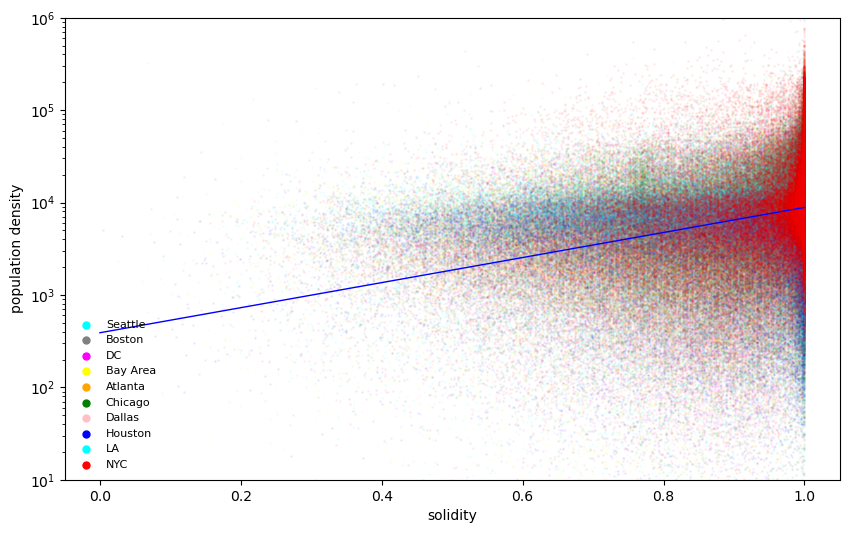

In [21]:
trans=0.05
size=1

plt.figure(figsize=(10,6))
plt.scatter(seattle.solidity, seattle.pop_den, alpha=trans, s=size, c='aqua', label='Seattle')
plt.scatter(boston.solidity, boston.pop_den, alpha=trans, s=size, c='grey', label='Boston')
plt.scatter(dc.solidity, dc.pop_den, alpha=trans, s=size, c='magenta', label='DC')
plt.scatter(bay.solidity, bay.pop_den, alpha=trans, s=size, c='yellow', label='Bay Area')
plt.scatter(atlanta.solidity, atlanta.pop_den, alpha=trans, s=size, c='orange', label='Atlanta')
plt.scatter(chicago.solidity, chicago.pop_den, alpha=trans, s=size, c='green', label='Chicago')
plt.scatter(dallas.solidity, dallas.pop_den, alpha=trans, s=size, c='pink', label='Dallas')
plt.scatter(houston.solidity, houston.pop_den, alpha=trans, s=size, c='blue', label='Houston')
plt.scatter(la.solidity, la.pop_den, alpha=trans, s=size, c='cyan', label='LA')
plt.scatter(nyc.solidity, nyc.pop_den, alpha=trans, s=size, c='red', label='NYC')

gx = np.linspace(0,1,100)
line_sol = np.exp(ols_sol.intercept_ + ols_sol.coef_[0] * gx)
plt.plot(gx, line_sol, color='blue', linewidth=1)

# plt.xlim(10**-0.5, 1)
# plt.xscale("log")
plt.yscale("log")
plt.ylim(1e1,1e6)

plt.xlabel('solidity')
plt.ylabel('population density')
leg = plt.legend(loc='lower left', fontsize=8, frameon=False, markerscale=5)
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.show()

# Combined Model

In [69]:
x = combined[['area', 'isoperi', 'rectan', 'solidity']][combined.pop_den > 0].copy()
x['area'] = np.log(x['area'])

x_normalized = normalize(x - np.mean(x, axis=0), axis=0)

y = np.log(combined.pop_den[combined.pop_den > 0])

ols_combined = LinearRegression().fit(x_normalized, y)
print(ols_combined.intercept_)
print(ols_combined.coef_)

y_pred_log = ols_combined.predict(x_normalized)

mse = mean_squared_error(y, y_pred_log)
r2 = r2_score(y, y_pred_log)

print(mse)
print(r2)

8.829801936316581
[-631.63417958  -59.21618274  163.85710607  -91.97658485]
0.8726892363364264
0.4457008843262328


In [70]:
import statsmodels.api as sm
X = sm.add_constant(x_normalized)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                pop_den   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.201e+05
Date:                Sun, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:00:56   Log-Likelihood:            -8.0730e+05
No. Observations:              597620   AIC:                         1.615e+06
Df Residuals:                  597615   BIC:                         1.615e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8298      0.001   7306.879      0.0

In [71]:
print(model.pvalues)

const    0.0
x1       0.0
x2       0.0
x3       0.0
x4       0.0
dtype: float64


# Logistic Regression

In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import zero_one_loss

X = combined[["area", "isoperi", "solidity", "rectan"]].to_numpy()
y = (combined["ur20"] == "U").astype(int).to_numpy()

ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)

logit = LogisticRegression(max_iter=1000).fit(X_scaled, y)
y_pred = logit.predict(X_scaled)

print(logit.intercept_)
print(logit.coef_)
print(zero_one_loss(y, y_pred))

[3.94101566]
[[-1.0308595  -0.02940404 -0.33024636  0.98862911]]
0.02986667095592921


In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import zero_one_loss

X = combined[["area", "isoperi", "solidity", "rectan"]].to_numpy()
y = (combined["ur20"] == "U").astype(int).to_numpy()

def bootstrap_kfold(X, y, B=200, k=10, seed=0):
    rng = np.random.default_rng(seed)
    n, p = X.shape
    coefs, intercepts, errs = [], [], []
    for b in range(B):
        idx = rng.integers(0, n, n)
        Xb, yb = X[idx], y[idx]
        kf = KFold(n_splits=k, shuffle=True, random_state=b)
        y_pred = np.empty_like(yb)
        for tr, te in kf.split(Xb):
            ss = StandardScaler().fit(Xb[tr])
            Xt, Xs = ss.transform(Xb[tr]), ss.transform(Xb[te])
            m = LogisticRegression(max_iter=1000).fit(Xt, yb[tr])
            y_pred[te] = m.predict(Xs)
            coefs.append(m.coef_[0])
            intercepts.append(m.intercept_[0])
        errs.append(zero_one_loss(yb, y_pred))
    return np.array(intercepts), np.array(coefs), np.array(errs)

intercepts, coefs, errs = bootstrap_kfold(X, y, B=200, k=10, seed=0)

print(intercepts.mean())
print(coefs.mean(axis=0))
print(errs.mean())

3.94101552645049
[-1.02601008 -0.02682029 -0.33139737  0.98844484]
0.029860706200262984


In [27]:
intercept_mean = intercepts.mean()
coef_mean = coefs.mean(axis=0)

ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)

z = intercept_mean + np.dot(X_scaled, coef_mean)
proba = 1 / (1 + np.exp(-z))
combined["pred_ur20"] = (proba >= 0.5).astype(int)

In [28]:
combined.ur20.value_counts()

ur20
U    721822
R     24227
Name: count, dtype: int64

In [29]:
combined.pred_ur20.value_counts()

pred_ur20
1    740583
0      5466
Name: count, dtype: int64

In [30]:
sizes = [city.shape[0] for city in cities]

In [31]:
names = ["nyc", "la", "chicago", "bay", "dallas", "dc", "houston", "boston", "atlanta", "seattle"]

dfs = {}
start = 0
for name, size in zip(names, sizes):
    dfs[name] = combined.iloc[start:start+size].copy()
    start += size

nyc_ml, la_ml, chicago_ml, bay_ml, dallas_ml, dc_ml, houston_ml, boston_ml, atlanta_ml, seattle_ml = (
    dfs["nyc"], dfs["la"], dfs["chicago"], dfs["bay"], dfs["dallas"],
    dfs["dc"], dfs["houston"], dfs["boston"], dfs["atlanta"], dfs["seattle"])

# Test for New City: Philadelphia

In [32]:
philadelphia = pd.read_sql("SELECT ur20, area, isoperi, solidity, rectan FROM public.philadelphia", con=engine)

In [33]:
philadelphia

,ur20,area,isoperi,solidity,rectan
0,R,1722347.133,0.072,0.367,0.285
1,U,2153346.304,0.319,0.773,0.578
2,U,620278.218,0.171,0.658,0.512
3,U,616270.250,0.068,0.394,0.281
4,U,2020105.913,0.391,0.831,0.651
...,...,...,...,...,...
79607,U,275835.262,0.211,0.585,0.443
79608,U,2152.247,0.237,0.980,0.927
79609,U,10547.340,0.558,1.000,0.976
79610,U,4817.060,0.706,1.000,0.956


In [34]:
intercept_mean = intercepts.mean()
coef_mean = coefs.mean(axis=0)

X_phil = philadelphia[["area", "isoperi", "solidity", "rectan"]].to_numpy()
X_phil_scaled = ss.transform(X_phil)

z = intercept_mean + np.dot(X_phil_scaled, coef_mean)
proba = 1 / (1 + np.exp(-z))
philadelphia["pred_ur20"] = (proba >= 0.5).astype(int)

In [35]:
y_true = (philadelphia["ur20"] == "U").astype(int).to_numpy()
y_pred = philadelphia["pred_ur20"].to_numpy()

error_rate = zero_one_loss(y_true, y_pred)
print(error_rate)

0.06266643219615131
